# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Creating URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f'{url}appid={api_key}&units=imperial&q='

#Creating blank list to store Values
count=0
sets=1
lat = []
long = []
country = []
humid = []
cloud = []
max_temp = []
wind_speed = []
date = []
city_name=[]
print("Beginning Data Retrieval")
print("------------------------------")

#FInding all the cities and store it in the list
for city in cities:
    try:
        response=requests.get(query_url+city).json()
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        cloud.append(response["clouds"]["all"])
        humid.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        #update record number and set number
        if count>=50:
            count=1
            sets+=1
            city_name.append(city)
        else:
            count+=1
            city_name.append(city)
        print(f"Processing Record {count} of Set {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")  #Skipping all the cities that are not found
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")


Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | mehamn
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | zrnovci
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | arlit
Processing Record 6 of Set 1 | luebo
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | camacupa
Processing Record 10 of Set 1 | albany
City not found. Skipping...
Processing Record 11 of Set 1 | kutum
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | williams lake
Processing Record 14 of Set 1 | pemangkat
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | bonthe
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | manadhoo
Processing Record 21 of Set 1 | shetpe
Processing Record 22 of S

Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | hithadhoo
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | san juan
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | bredasdorp
Processing Record 46 of Set 4 | gamba
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | hualmay
City not found. Skipping...
Processing Record 49 of Set 4 | pangkalanbuun
Processing Record 50 of Set 4 | berwick
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | acapulco
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | harper
Processing Record 6 of Set 5 | kota kinabalu
Processing Record 7 of Set 5 | lermontovka
Processing Record 8 of Set 5 | aksakovo
Processing Record 9 of Set 5 | jishu
Processing Record 10 of Set 5 | pisco
Processing Record 11 of Set 5 | puerto madryn
Processing Record 12 of Set 5 | ambilobe
Processing Record 

Processing Record 26 of Set 8 | poum
Processing Record 27 of Set 8 | tullow
Processing Record 28 of Set 8 | sur
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | lorengau
Processing Record 31 of Set 8 | cap-aux-meules
Processing Record 32 of Set 8 | okha
Processing Record 33 of Set 8 | tual
Processing Record 34 of Set 8 | priladozhskiy
Processing Record 35 of Set 8 | acacoyagua
Processing Record 36 of Set 8 | valparaiso
Processing Record 37 of Set 8 | sidi bin nur
Processing Record 38 of Set 8 | amahai
Processing Record 39 of Set 8 | mogadishu
Processing Record 40 of Set 8 | manzhouli
City not found. Skipping...
City not found. Skipping...
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | jiangyou
Processing Record 43 of Set 8 | sungaipenuh
Processing Record 44 of Set 8 | coahuayana
Processing Record 45 of Set 8 | thomasville
Processing Record 46 of Set 8 | tadine
Processing Record 47 of Set 8 | acari
Processing Record 48 of Set 8 | kla

In [4]:
#Store in a dataframe
city_sum = {'City':city_name,'Lat':lat,'Lng':long,'Max Temp':max_temp,'Humidity':humid,
            'Cloudiness':cloud,'Wind Speed':wind_speed,'Country':country,'Date':date}
city_summary = pd.DataFrame(city_sum)
city_summary.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mehamn,71.0357,27.8492,25.56,93,100,16.71,NO,1612593836
1,cherskiy,68.7500,161.3000,-6.68,80,100,4.09,RU,1612593836
2,zrnovci,41.8542,22.4444,39.20,93,90,1.05,MK,1612593836
3,jamestown,42.0970,-79.2353,21.99,93,90,13.80,US,1612593745
4,arlit,18.7369,7.3853,63.30,27,0,6.96,NE,1612593836
5,luebo,-5.3500,21.4167,72.21,96,100,1.25,CD,1612593836
6,vaini,-21.2000,-175.2000,78.80,100,75,4.61,TO,1612593837
7,bluff,-46.6000,168.3333,58.26,83,0,8.93,NZ,1612593837
8,camacupa,-12.0167,17.4833,66.63,92,100,0.45,AO,1612593837
9,albany,42.6001,-73.9662,32.00,86,90,9.22,US,1612593742


In [5]:
#Summary Stats for city_summary
city_summary.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,19.198414,20.918141,51.594890,74.122711,54.126374,7.905256,1.612594e+09
std,33.670670,88.995699,30.860468,19.146982,41.112204,5.494964,7.073099e+01
min,-54.800000,-175.200000,-43.600000,12.000000,0.000000,0.110000,1.612593e+09
25%,-9.515925,-59.471350,32.000000,65.000000,5.250000,3.512500,1.612594e+09
50%,22.591500,23.841650,60.800000,78.000000,65.500000,6.455000,1.612594e+09
75%,47.432275,100.349575,76.455000,89.000000,98.000000,11.180000,1.612594e+09
max,78.218600,179.316700,96.800000,100.000000,100.000000,31.070000,1.612594e+09


In [6]:
#Exporting the city_summary to a csv file
city_summary.to_csv('City_Weather_Data1.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#Checking if there are any data that has humidity > 100%
print("The max value for humidity is: " + str(city_summary['Humidity'].max()) + '%')
humid_sort = city_summary.sort_values('Humidity',ascending = False)
humid_sort

The max value for humidity is: 100%


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
414,corlu,41.1592,27.8000,46.40,100,90,6.91,TR,1612593682
207,aksakovo,43.2500,27.8167,44.01,100,40,4.61,BG,1612593858
286,sopelana,43.3789,-2.9831,53.01,100,75,4.61,ES,1612593867
492,bulaevo,54.9056,70.4439,33.71,100,100,12.50,KZ,1612593891
281,san javier,37.8063,-0.8374,53.01,100,0,1.14,ES,1612593866
...,...,...,...,...,...,...,...,...,...
129,ambagarh chauki,20.7833,80.7167,84.34,18,1,5.48,IN,1612593851
476,bam,29.1060,58.3570,73.13,16,0,2.53,IR,1612593889
279,marzuq,14.4000,46.4667,76.23,15,0,4.14,YE,1612593866
27,juba,4.8517,31.5825,82.53,15,2,7.25,SS,1612593839


In [8]:
#  Get the indices of cities that have humidity over 100%.
#None are higher than 100 in this dataset

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#NA

In [10]:
#Getting the current date
date_now = datetime.date(datetime.now())
print(date_now)

2021-02-06


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

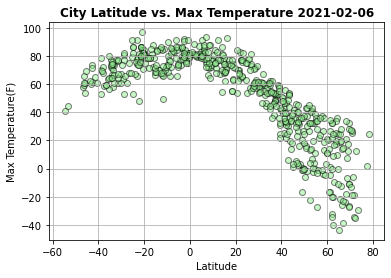

In [105]:
#Lat vs max temp scatter plot
x1 = city_summary['Lat']
y1 = city_summary['Max Temp']
plt.scatter(x1,y1,facecolors = 'lightgreen',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Max Temperature {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.grid()
plt.savefig('Output Image/Lat vs. Max Temp 210206 Plot.png')
plt.show()

## Latitude vs. Humidity Plot

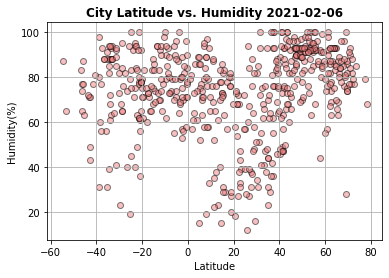

In [106]:
#Lat vs Humidity scatter plot
x2 = city_summary['Lat']
y2 = city_summary['Humidity']
plt.scatter(x2,y2,facecolors = 'lightcoral',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Humidity {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig('Output Image/Lat vs. Humidity 210206 Plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

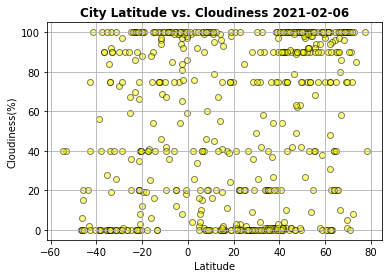

In [107]:
#Lat vs Cloudiness scatter plot
x3 = city_summary['Lat']
y3 = city_summary['Cloudiness']
plt.scatter(x3,y3,facecolors = 'yellow',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Cloudiness {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()
plt.savefig('Output Image/Lat vs. Cloudiness 210206 Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

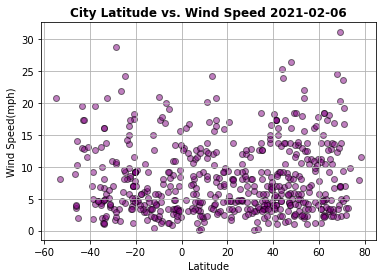

In [108]:
#Lat vs Wind Speed Scatter Plot
x4 = city_summary['Lat']
y4 = city_summary['Wind Speed']
plt.scatter(x4,y4,facecolors = 'purple',edgecolor = 'black',alpha = 0.5)
plt.title(f'City Latitude vs. Wind Speed {date_now}',fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig('Output Image/Lat vs. Wind Speed 210206 Plot.png')
plt.show()

## Linear Regression

In [109]:
#Setting up new dataframes storing data that are in the north hem and south ham
north = city_summary.loc[city_summary['Lat'] >= 0]
south = city_summary.loc[city_summary['Lat'] < 0]
north.head()
#south.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mehamn,71.0357,27.8492,25.56,93,100,16.71,NO,1612593836
1,cherskiy,68.7500,161.3000,-6.68,80,100,4.09,RU,1612593836
2,zrnovci,41.8542,22.4444,39.20,93,90,1.05,MK,1612593836
3,jamestown,42.0970,-79.2353,21.99,93,90,13.80,US,1612593745
4,arlit,18.7369,7.3853,63.30,27,0,6.96,NE,1612593836


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8738536310379063


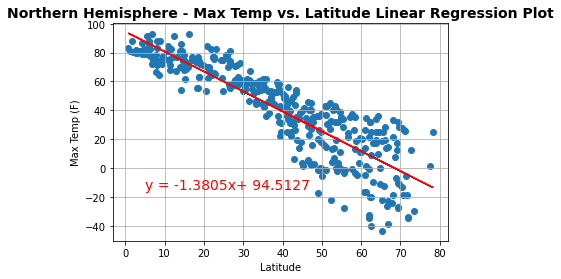

In [110]:
#Linear Reg plot for Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x5 = north['Lat']
y5 = north['Max Temp']
(slope1,intercept1,rvalue1,pvalue1,stderr1) = linregress(x5,y5)
print(f'The r-value is: {rvalue1}')
plt.scatter(x5,y5)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
line1 = x5 * slope1 + intercept1
linear_eq1 = 'y = ' + str(round(slope1,4)) + 'x+ ' + str(round(intercept1,4))
plt.annotate(linear_eq1,(5,-15),fontsize = 14, color = 'red')
plt.plot(x5,line1,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Max Temp vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5768235404667897


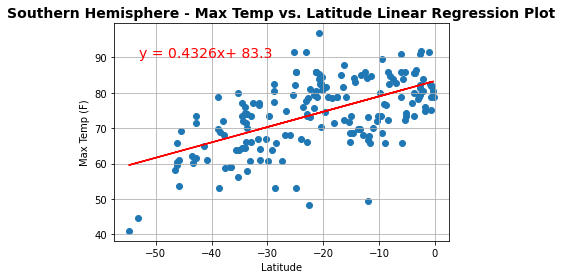

In [111]:
#Linear Reg plot for Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x6 = south['Lat']
y6 = south['Max Temp']
(slope2,intercept2,rvalue2,pvalue2,stderr2) = linregress(x6,y6)
print(f'The r-value is: {rvalue2}')
plt.scatter(x6,y6)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
line2 = x6 * slope2 + intercept2
linear_eq2 = 'y = ' + str(round(slope2,4)) + 'x+ ' + str(round(intercept2,4))
plt.annotate(linear_eq2,(-53,90),fontsize = 14, color = 'red')
plt.plot(x6,line2,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Max Temp vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.39715691954856314


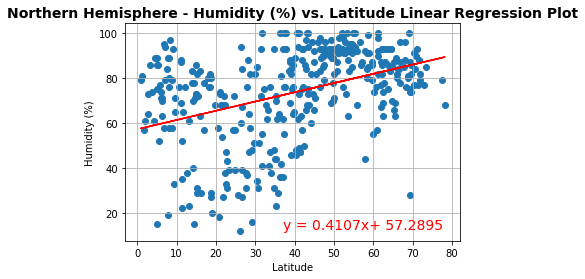

In [112]:
#Linear Reg plot for Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x7 = north['Lat']
y7 = north['Humidity']
(slope3,intercept3,rvalue3,pvalue3,stderr3) = linregress(x7,y7)
print(f'The r-value is: {rvalue3}')
plt.scatter(x7,y7)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line3 = x7 * slope3 + intercept3
linear_eq3 = 'y = ' + str(round(slope3,4)) + 'x+ ' + str(round(intercept3,4))
plt.annotate(linear_eq3,(37,13),fontsize = 14, color = 'red')
plt.plot(x7,line3,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Humidity vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.11595110077560547


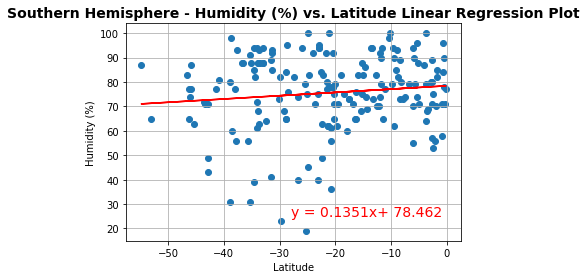

In [113]:
#Linear Reg plot for Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x8 = south['Lat']
y8 = south['Humidity']
(slope4,intercept4,rvalue4,pvalue4,stderr4) = linregress(x8,y8)
print(f'The r-value is: {rvalue4}')
plt.scatter(x8,y8)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
line4 = x8 * slope4 + intercept4
linear_eq4 = 'y = ' + str(round(slope4,4)) + 'x+ ' + str(round(intercept4,4))
plt.annotate(linear_eq4,(-28,25),fontsize = 14, color = 'red')
plt.plot(x8,line4,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Humidity vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.32250545471218584


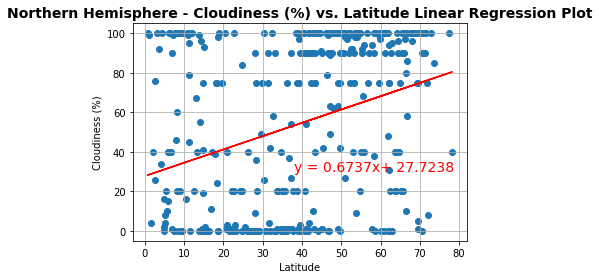

In [114]:
#Linear Reg Plot for Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x9 = north['Lat']
y9 = north['Cloudiness']
(slope5,intercept5,rvalue5,pvalue5,stderr5) = linregress(x9,y9)
print(f'The r-value is: {rvalue5}')
plt.scatter(x9,y9)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
line5 = x9 * slope5 + intercept5
linear_eq5 = 'y = ' + str(round(slope5,4)) + 'x+ ' + str(round(intercept5,4))
plt.annotate(linear_eq5,(38,30),fontsize = 14, color = 'red')
plt.plot(x9,line5,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Cloudiness vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

The r-value is: 0.4305683919028086


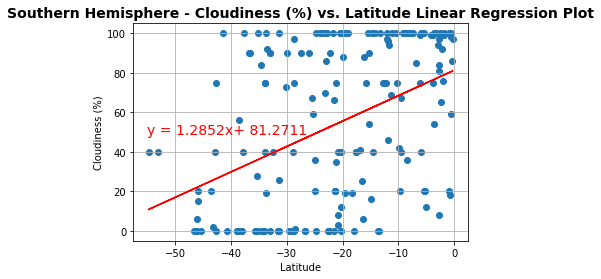

In [115]:
#Linear Reg Plot for Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x10 = south['Lat']
y10 = south['Cloudiness']
(slope6,intercept6,rvalue6,pvalue6,stderr6) = linregress(x10,y10)
print(f'The r-value is: {rvalue6}')
plt.scatter(x10,y10)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
line6 = x10 * slope6 + intercept6
linear_eq6 = 'y = ' + str(round(slope6,4)) + 'x+ ' + str(round(intercept6,4))
plt.annotate(linear_eq6,(-55,49),fontsize = 14, color = 'red')
plt.plot(x10,line6,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Cloudiness vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08978765991219875


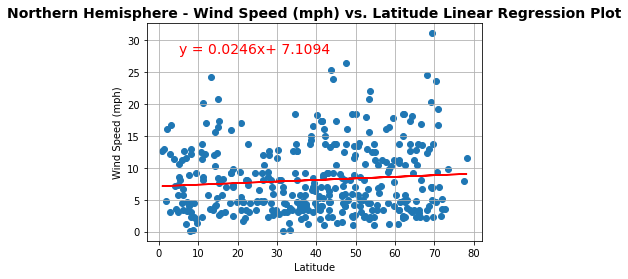

In [116]:
#Linear Reg Plot for Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x11 = north['Lat']
y11 = north['Wind Speed']
(slope7,intercept7,rvalue7,pvalue7,stderr7) = linregress(x11,y11)
print(f'The r-value is: {rvalue7}')
plt.scatter(x11,y11)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
line7 = x11 * slope7 + intercept7
linear_eq7 = 'y = ' + str(round(slope7,4)) + 'x+ ' + str(round(intercept7,4))
plt.annotate(linear_eq7,(5,28),fontsize = 14, color = 'red')
plt.plot(x11,line7,color = 'r')
plt.grid()
plt.savefig('Output Image/N Hemp - Wind Speed vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1743143428275229


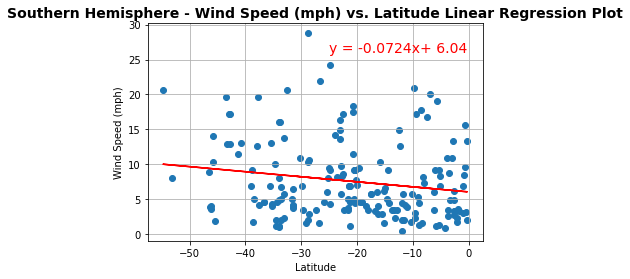

In [117]:
#Linear Reg Plot for Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x12 = south['Lat']
y12 = south['Wind Speed']
(slope8,intercept8,rvalue8,pvalue8,stderr8) = linregress(x12,y12)
print(f'The r-value is: {rvalue8}')
plt.scatter(x12,y12)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression Plot',
          fontsize = 14, fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
line8 = x12 * slope8 + intercept8
linear_eq8 = 'y = ' + str(round(slope8,4)) + 'x+ ' + str(round(intercept8,4))
plt.annotate(linear_eq8,(-25,26),fontsize = 14, color = 'red')
plt.plot(x12,line8,color = 'r')
plt.grid()
plt.savefig('Output Image/S Hemp - Wind Speed vs. Latitude Linear Regression.png',bbox_inches='tight')
plt.show()